In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
dados = pd.read_csv("data/data_imovel.csv")

dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<AxesSubplot: >

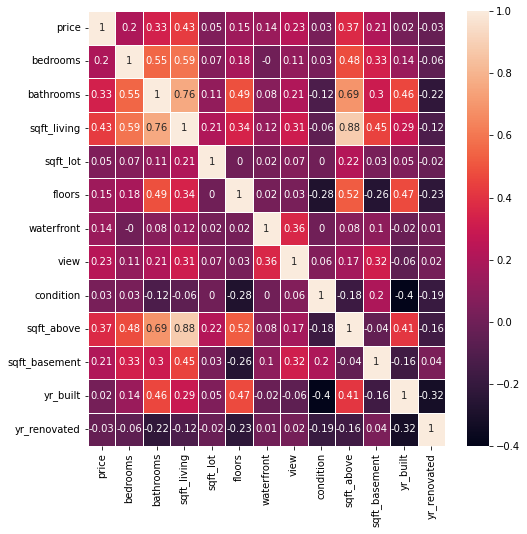

In [3]:
correlation_matrix = dados.corr().round(2)

fig, axis = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidth=0.5, ax=axis)

In [4]:
x = dados[["sqft_living", "bathrooms"]].values
y = dados["price"].values

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

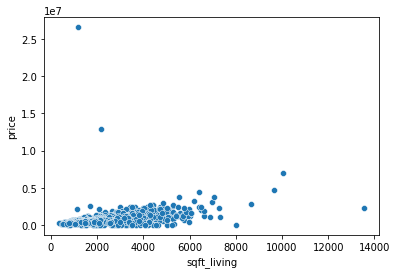

In [5]:
sns.scatterplot(data = dados, x="sqft_living", y= "price")

<AxesSubplot: xlabel='bathrooms', ylabel='price'>

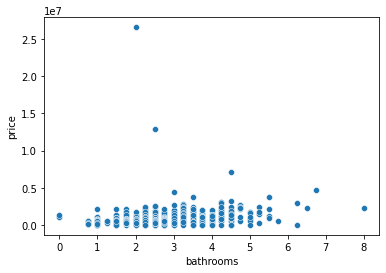

In [6]:
sns.scatterplot(data = dados, x="bathrooms", y= "price")

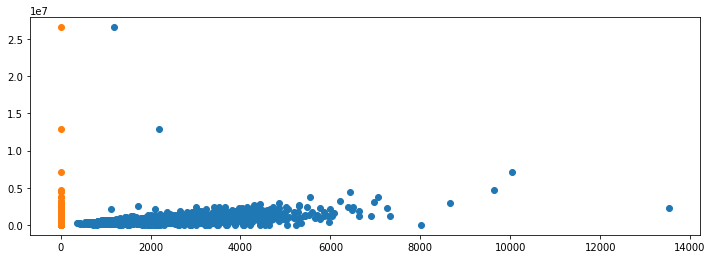

In [7]:
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(x[:,0],y)
ax.scatter(x[:,1],y)

<AxesSubplot: xlabel='sqft_living', ylabel='Count'>

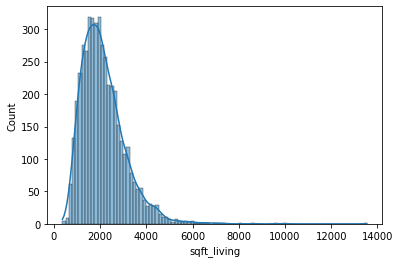

In [8]:
sns.histplot(data=dados, x="sqft_living", kde=True)

<AxesSubplot: xlabel='bathrooms', ylabel='Count'>

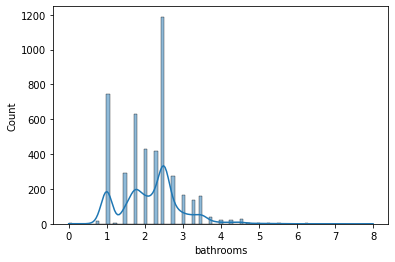

In [9]:
sns.histplot(data=dados, x="bathrooms", kde=True)

<AxesSubplot: >

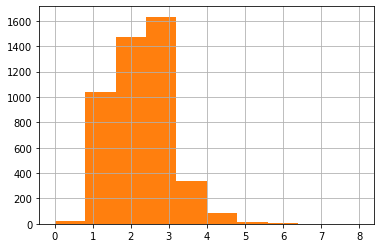

In [10]:
hist_variaveis = pd.DataFrame(dados,columns=["sqtf_living", "bathrooms"])

hist_variaveis["sqtf_living"].hist()
hist_variaveis["bathrooms"].hist()

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
# Padronizacao

scaler = StandardScaler()

x_std = scaler.fit_transform(x)

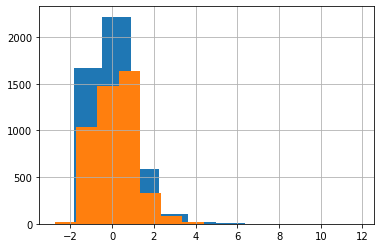

In [13]:
x_std = pd.DataFrame(x_std, columns=["sqt_living", "bathrooms"])
x_std["sqt_living"].hist();
x_std["bathrooms"].hist();

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [16]:
x = dados[["sqft_living", "bathrooms"]].values
y = dados["price"].values

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=7)

In [18]:
len(x_train)

3450

In [19]:
len(x_test)

1150

In [20]:
x_train

array([[2.400e+03, 3.250e+00],
       [1.954e+03, 2.500e+00],
       [2.620e+03, 2.750e+00],
       ...,
       [3.490e+03, 3.750e+00],
       [2.380e+03, 2.500e+00],
       [1.790e+03, 2.500e+00]])

In [21]:
# Normalizando

scaler = MinMaxScaler()

scaler.fit(x_train)

MinMaxScaler()

In [22]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
x_train_scaled

array([[0.15349544, 0.40625   ],
       [0.11960486, 0.3125    ],
       [0.17021277, 0.34375   ],
       ...,
       [0.23632219, 0.46875   ],
       [0.15197568, 0.3125    ],
       [0.10714286, 0.3125    ]])

In [24]:
model = LinearRegression()

model.fit(x_train_scaled, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(x_test_scaled)

In [26]:
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: ", MAE)
print("R2: ", r2)

MAE:  173536.74188212887
R2:  0.460589559677016


In [27]:
model_normal = LinearRegression()

model_normal.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred_normal = model_normal.predict(x_test)

In [29]:
MAE_normal = mean_absolute_error(y_test, y_pred_normal)
r2_normal = r2_score(y_test, y_pred_normal)
print("MAE: ", MAE_normal)
print("R2: ", r2_normal)

MAE:  173536.74188212887
R2:  0.460589559677016
